In [2]:
from matplotlib import pyplot as plt
import pandas
import seaborn as sns

%matplotlib inline

FIG_WIDTH=20
FIG_HEIGTH=8


# Debian Xorg + GNOME tests
Those tests were run in my regular workstation, using GNOME + Xorg

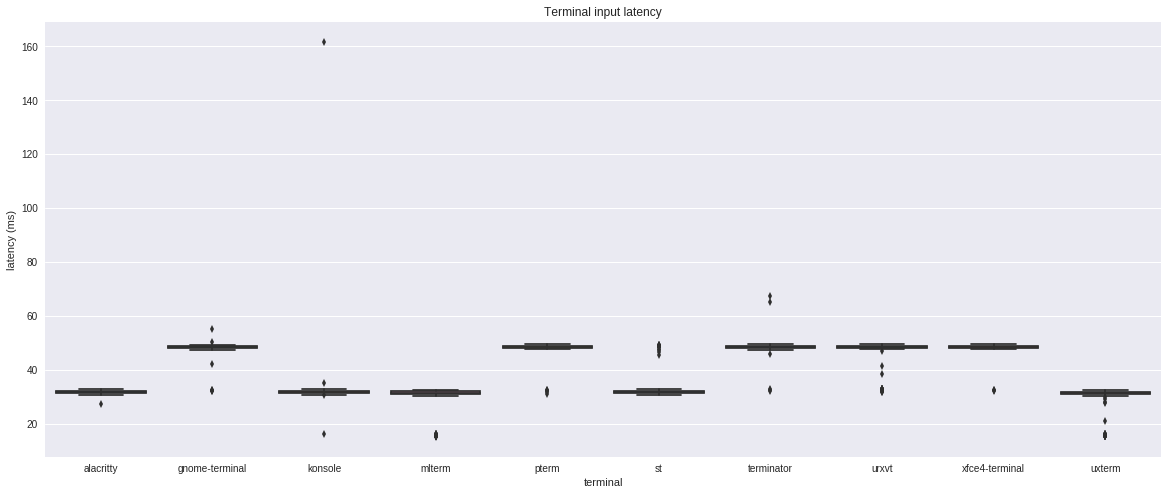

In [3]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

latency = pandas.read_csv('latency/debian9-xorg.csv')

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')

# Debian Xorg + i3
Those were run using a simpler session using the i3 window manager.

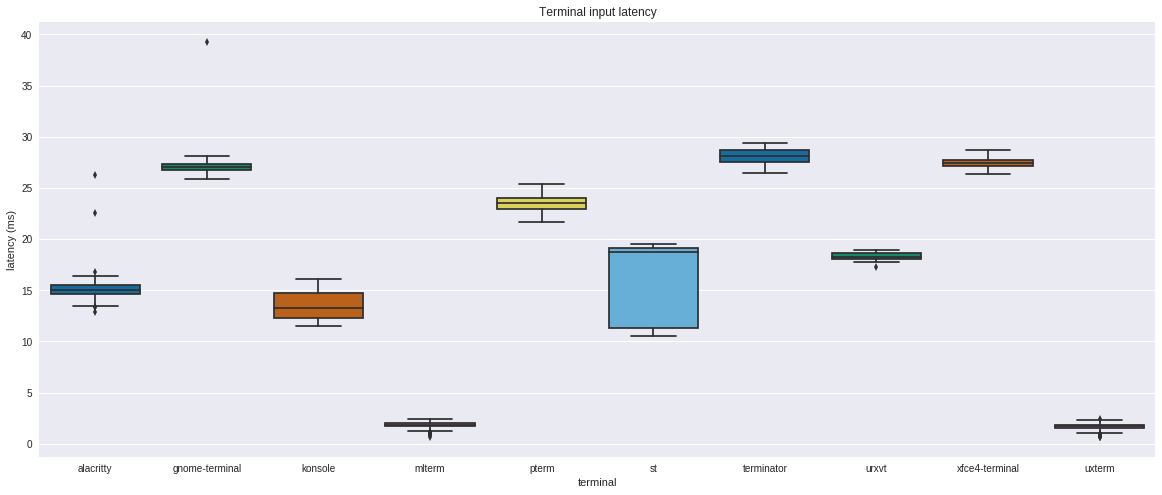

In [5]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

latency = pandas.read_csv('latency/debian9-xorg-i3.csv')
latency.drop(["urxvt-xft-monospace", "urxvt-fixed-16", "urxvt-fixed-16-float"], axis=1, inplace=True)

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')


# Fedora GNOME + Xorg
Those tests were ran on Fedora 27 with the default GNOME + Xorg session. The tests crash completely in Wayland.

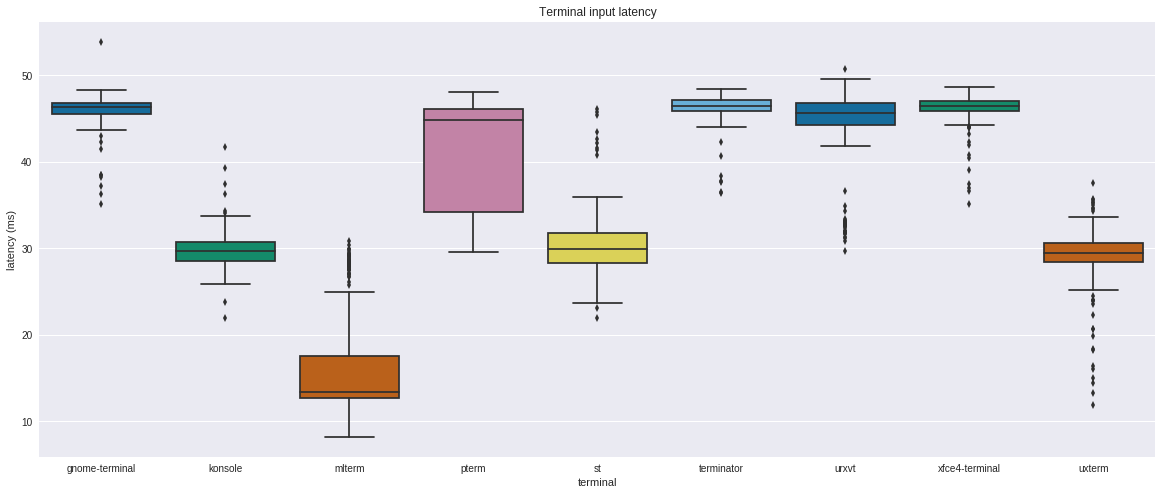

In [6]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

latency = pandas.read_csv('latency/fedora27-xorg.csv')

ax = sns.boxplot(data=latency, palette='colorblind')
ax.set_title('Terminal input latency')
ax.set_xlabel('terminal')
ax.set_ylabel('latency (ms)')


# Processing time (wall time)

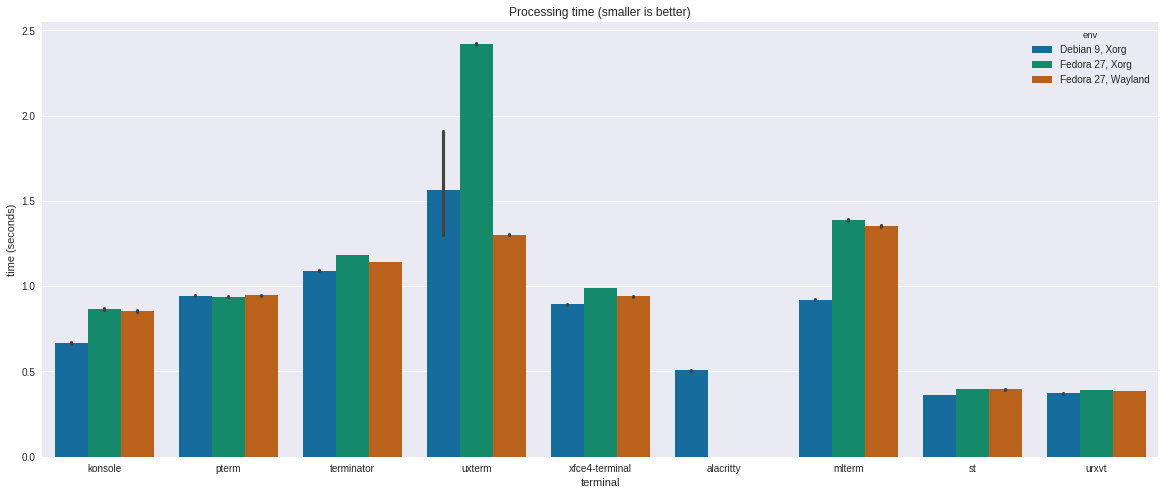

In [9]:
deb9_xorg = pandas.read_csv('debian9-xorg-prime-100x100000.csv').assign(env='Debian 9, Xorg')
f27_xorg = pandas.read_csv('fedora27-xorg-prime-100x100000.csv').assign(env='Fedora 27, Xorg')
f27_wayland = pandas.read_csv('fedora27-wayland-prime-100x100000.csv').assign(env='Fedora 27, Wayland')

fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

data = pandas.concat([deb9_xorg, f27_xorg, f27_wayland])
data['terminal'].replace(['stterm'], 'st',inplace=True)
ax = sns.barplot(data=data, x='terminal', y='wtime', palette='colorblind', hue='env')
ax.set_title('Processing time (smaller is better)')
ax.set_ylabel('time (seconds)')

# system time

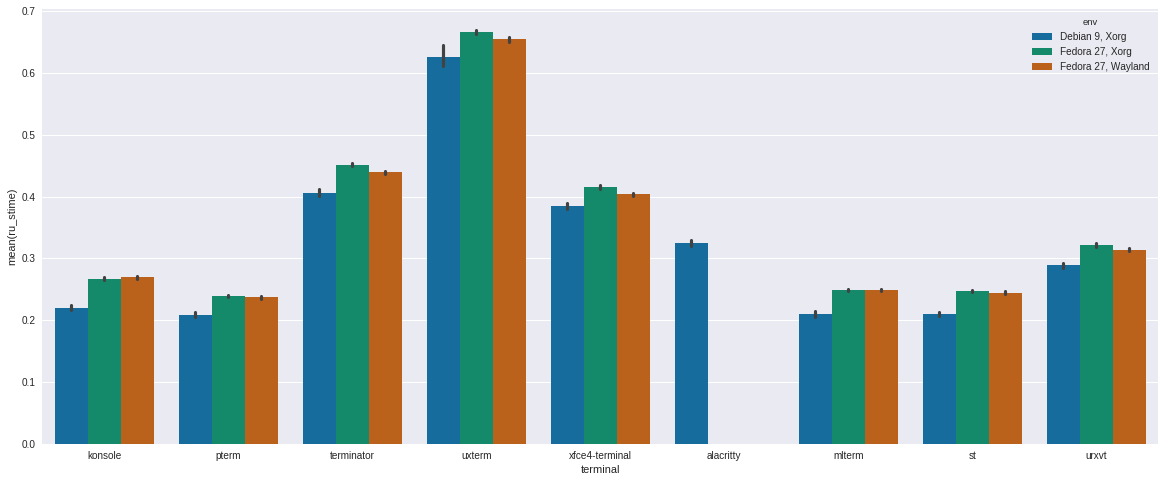

In [25]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='ru_stime', palette='colorblind', hue='env')

# user time

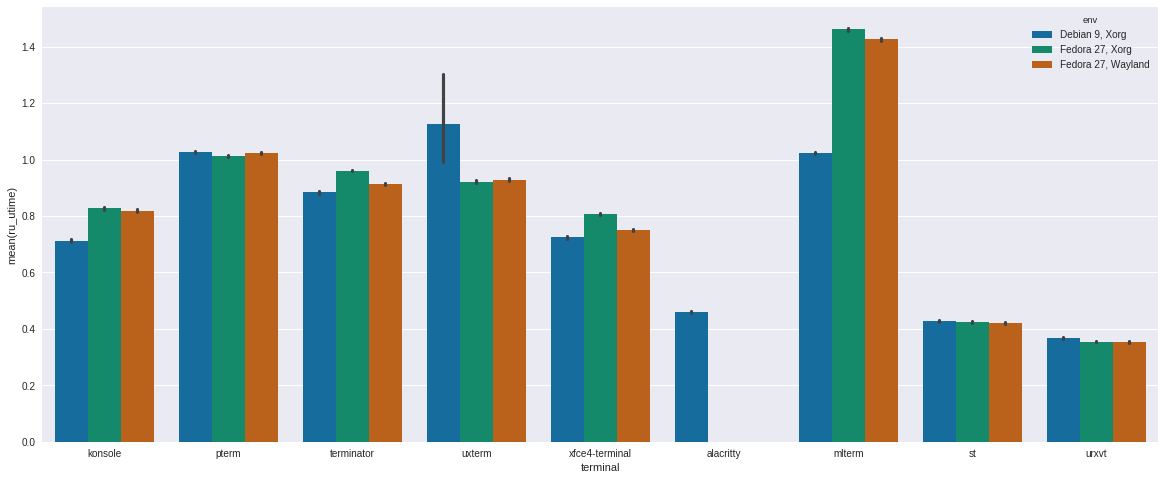

In [26]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='ru_utime', palette='colorblind', hue='env')

# Memory usage

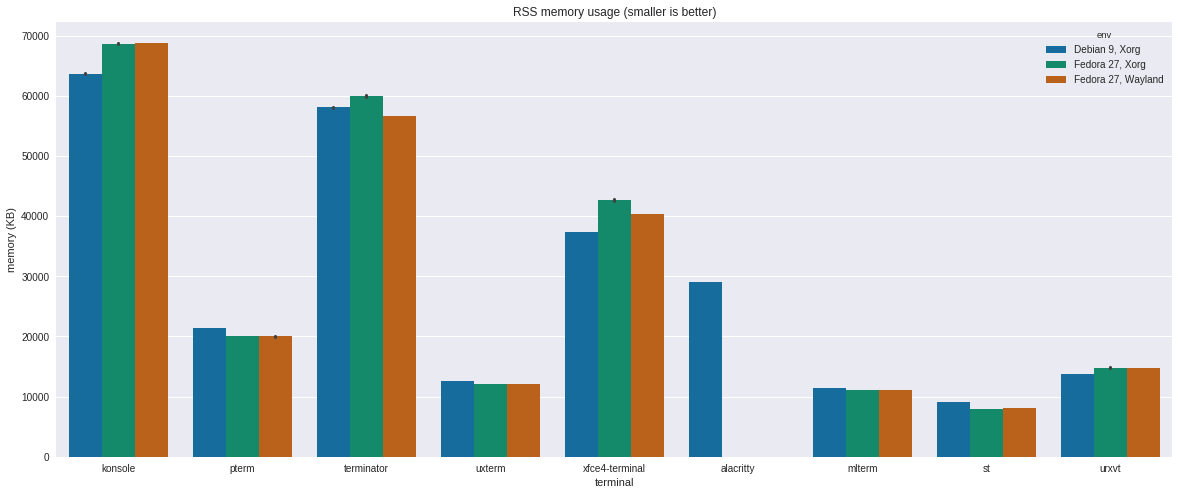

In [13]:
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='ru_maxrss', palette='colorblind', hue='env')
ax.set_title('RSS memory usage (smaller is better)')
ax.set_ylabel('memory (KB)')


# I/O usage

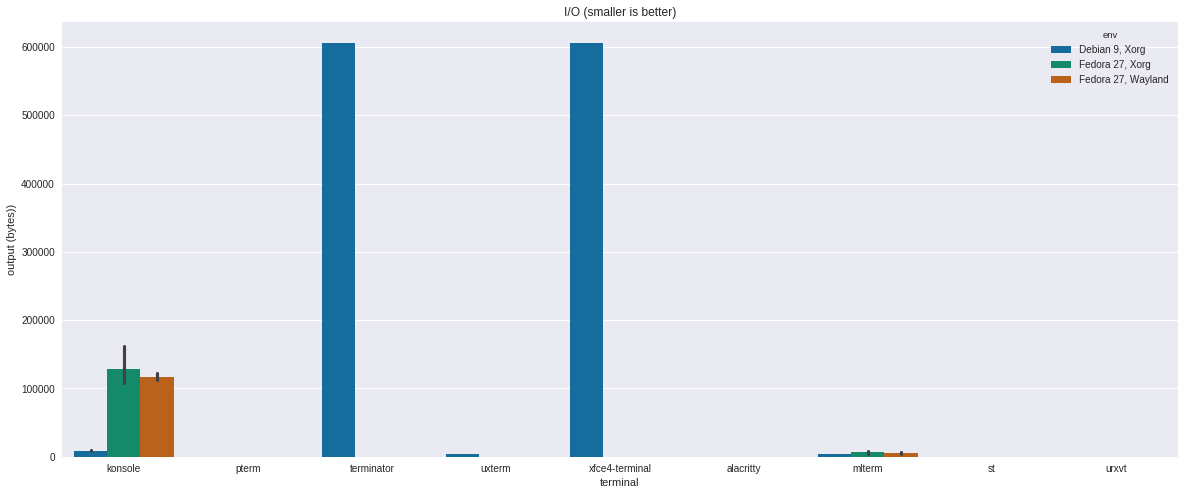

In [23]:
data['blocks'] = data['ru_inblock'] + data['ru_oublock']

# https://lkml.org/lkml/2007/3/19/84
# "block size" is apparently hardcoded to 512 bytes
data['out_bytes'] = data['ru_oublock'] * 512
fig, _ = plt.subplots()
fig.set_figwidth(FIG_WIDTH)
fig.set_figheight(FIG_HEIGTH)

ax = sns.barplot(data=data, x='terminal', y='out_bytes', palette='colorblind', hue='env')
ax.set_title('I/O (smaller is better)')
ax.set_ylabel('output (bytes))')
